# Quantiles graph

In the construction of quantile graphs the bins are defined by Q quantiles, q1, q2, ..., qQ. Each quantile, qi, is associated to a node vi of the graph so the graph has as many nodes as the number of quantiles. Two nodes vi and vj are connected by a weighted directed edge (vi, vj , wi,j ), where the weight wi,j represents the transition probability between quantile ranges.

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

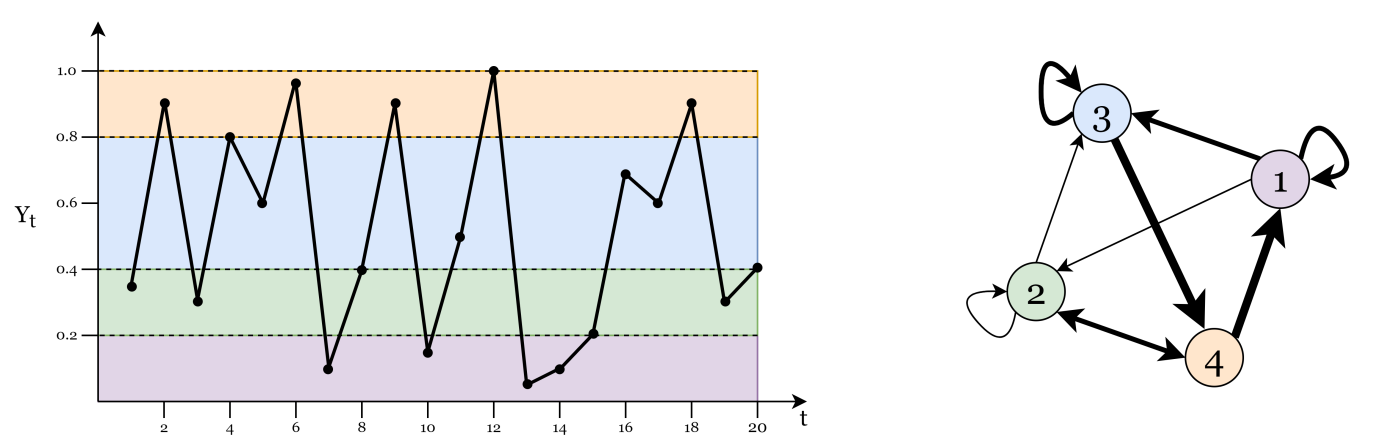

Illustrative example of the quantile graph algorithm for Q = 4. On the left panel we present the plot of a toy time series and on the right panel the network generated by the quantile graph algorithm. The different colors in the time series plot represent the regions corresponding to the different quantiles. In the network, edges with larger weights represented by thicker lines correspond to the repeated transitions between quantiles.

Here is an example of quantile graph made with our library:

In [5]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_to_graph import BuildTimeseriesToGraphQuantile
from to_graph.strategy_linking_multi_graphs import LinkGraphs

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

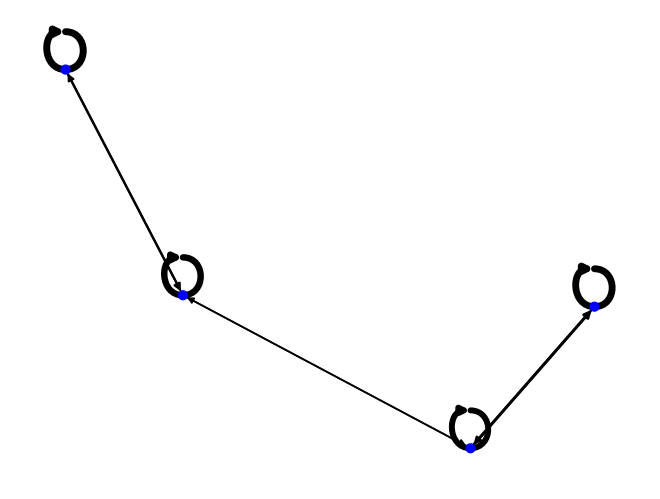

In [6]:
timegraph_quantile = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 120))\
    .to_graph(BuildTimeseriesToGraphQuantile(4, 1).get_strategy())\
    .draw("blue")

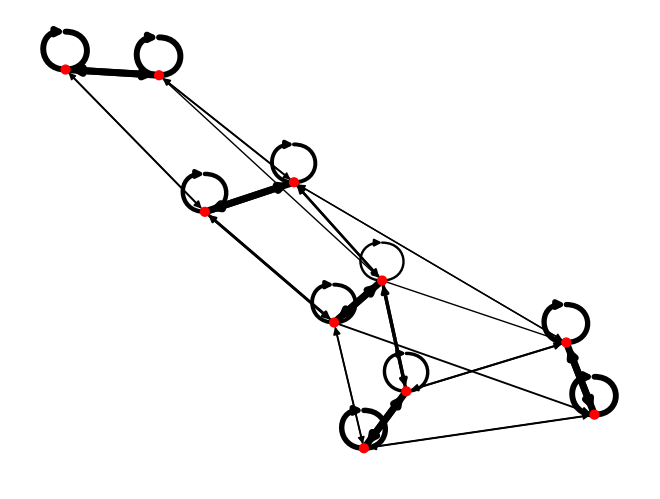

In [7]:
multivariate_timegraph_quantile = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 120))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
         .with_preprocessing(TimeseriesPreprocessingSegmentation(100, 160)))\
    .to_graph(BuildTimeseriesToGraphQuantile(5, 2).get_strategy())\
    .link(LinkGraphs().time_cooccurrence())\
    .draw("red")